In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)

In [58]:
df = pd.read_csv("earthquake1826_2026.csv")

In [59]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2026-01-07 22:00:13.258000+00:00,-23.4332,-179.8984,547.033,5.5,mww,63.0,39.0,5.976,1.13,us7000rnbi,2026-01-07T22:24:28.537Z,south of the Fiji Islands,earthquake,8.66,7.704,0.093,11.0,reviewed
1,2026-01-07 04:12:56.792000+00:00,7.2863,127.0595,11.854,5.5,mww,58.0,53.0,1.485,1.40,us7000rn4a,2026-01-07T16:31:18.040Z,"53 km E of Santiago, Philippines",earthquake,5.21,4.721,0.098,10.0,reviewed
2,2026-01-07 03:02:56.040000+00:00,7.3902,126.7221,35.000,6.4,mww,118.0,30.0,1.178,1.17,us7000rn2z,2026-01-07T15:50:12.915Z,"16 km ESE of Baculin, Philippines",earthquake,7.94,1.842,0.047,44.0,reviewed
3,2026-01-06 23:10:38.371000+00:00,-17.6276,168.2465,62.384,5.0,mww,47.0,79.0,2.388,0.54,us7000rn1j,2026-01-07T12:59:00.885Z,"13 km NNW of Port-Vila, Vanuatu",earthquake,9.64,6.266,0.103,9.0,reviewed
4,2026-01-06 19:17:09.696000+00:00,37.2523,74.6137,10.000,5.2,mb,112.0,54.0,1.991,0.88,us7000rmzt,2026-01-07T05:04:55.711Z,"103 km N of Barishal, Pakistan",earthquake,6.54,1.848,0.049,136.0,reviewed


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106077 entries, 0 to 106076
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             106077 non-null  object 
 1   latitude         106077 non-null  float64
 2   longitude        106077 non-null  float64
 3   depth            105484 non-null  float64
 4   mag              106077 non-null  float64
 5   magType          106077 non-null  object 
 6   nst              31347 non-null   float64
 7   gap              41986 non-null   float64
 8   dmin             21402 non-null   float64
 9   rms              74560 non-null   float64
 10  id               106077 non-null  object 
 11  updated          106077 non-null  object 
 12  place            105855 non-null  object 
 13  type             106077 non-null  object 
 14  horizontalError  19983 non-null   float64
 15  depthError       54440 non-null   float64
 16  magError         36554 non-null   floa

In [61]:
# unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

time: 106076
latitude: 75424
longitude: 83382
depth: 11665
mag: 314
magType: 28
nst: 737
gap: 1860
dmin: 8993
rms: 271
id: 106077
updated: 101803
place: 64262
type: 7
horizontalError: 1355
depthError: 3107
magError: 339
magNst: 665
status: 2


In [62]:
df["type"].unique()

array(['earthquake', 'landslide', 'volcanic eruption',
       'nuclear explosion', 'mine collapse', 'rock burst', 'explosion'],
      dtype=object)

In [63]:
df["status"].unique()

array(['reviewed', 'automatic'], dtype=object)

In [64]:
#drop id column
df = df.drop(columns=["id"])

In [65]:
num_cols = df.select_dtypes(include=["number"]).columns
cat_cols = df.select_dtypes(exclude=["number"]).columns

In [66]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                593
mag                    0
magType                0
nst                74730
gap                64091
dmin               84675
rms                31517
updated                0
place                222
type                   0
horizontalError    86094
depthError         51637
magError           69523
magNst             63724
status                 0
dtype: int64

In [68]:
#convert the dates and changing its format
df["time"] = pd.to_datetime(df["time"], errors="coerce", utc=True)

# Drop rows where time could not be parsed
df = df.dropna(subset=["time"])

In [69]:
#num columns median imputation
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [70]:
#cat columns with unknown
df[cat_cols] = df[cat_cols].fillna("unknown")

In [71]:
df["year"] = df["time"].dt.year

In [72]:
correlation = df[num_cols].corr()
correlation

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
latitude,1.000000,0.209940,-0.117369,0.050371,0.159812,-0.005607,-0.191532,-0.070824,-0.086326,0.044676,0.127659,0.105087
longitude,0.209940,1.000000,-0.082921,-0.001168,0.010163,-0.119396,-0.073430,-0.015835,-0.034701,0.014301,0.012325,0.012541
depth,-0.117369,-0.082921,1.000000,-0.015446,0.076656,-0.103551,-0.044133,-0.014264,0.020218,-0.014620,-0.073887,0.015935
mag,0.050371,-0.001168,-0.015446,1.000000,0.207376,-0.197545,-0.043707,0.039744,-0.029489,0.151268,0.370793,-0.097882
nst,0.159812,0.010163,0.076656,0.207376,1.000000,-0.281170,-0.040236,-0.040485,-0.030531,-0.054770,-0.048605,0.064666
gap,-0.005607,-0.119396,-0.103551,-0.197545,-0.281170,1.000000,0.017480,-0.018642,0.181283,0.045593,-0.031018,0.012414
dmin,-0.191532,-0.073430,-0.044133,-0.043707,-0.040236,0.017480,1.000000,-0.090745,0.266235,-0.083007,-0.073614,0.059023
rms,-0.070824,-0.015835,-0.014264,0.039744,-0.040485,-0.018642,-0.090745,1.000000,0.127737,0.040173,0.030179,-0.116464
horizontalError,-0.086326,-0.034701,0.020218,-0.029489,-0.030531,0.181283,0.266235,0.127737,1.000000,0.040903,0.006715,0.014412
depthError,0.044676,0.014301,-0.014620,0.151268,-0.054770,0.045593,-0.083007,0.040173,0.040903,1.000000,0.331434,-0.086248


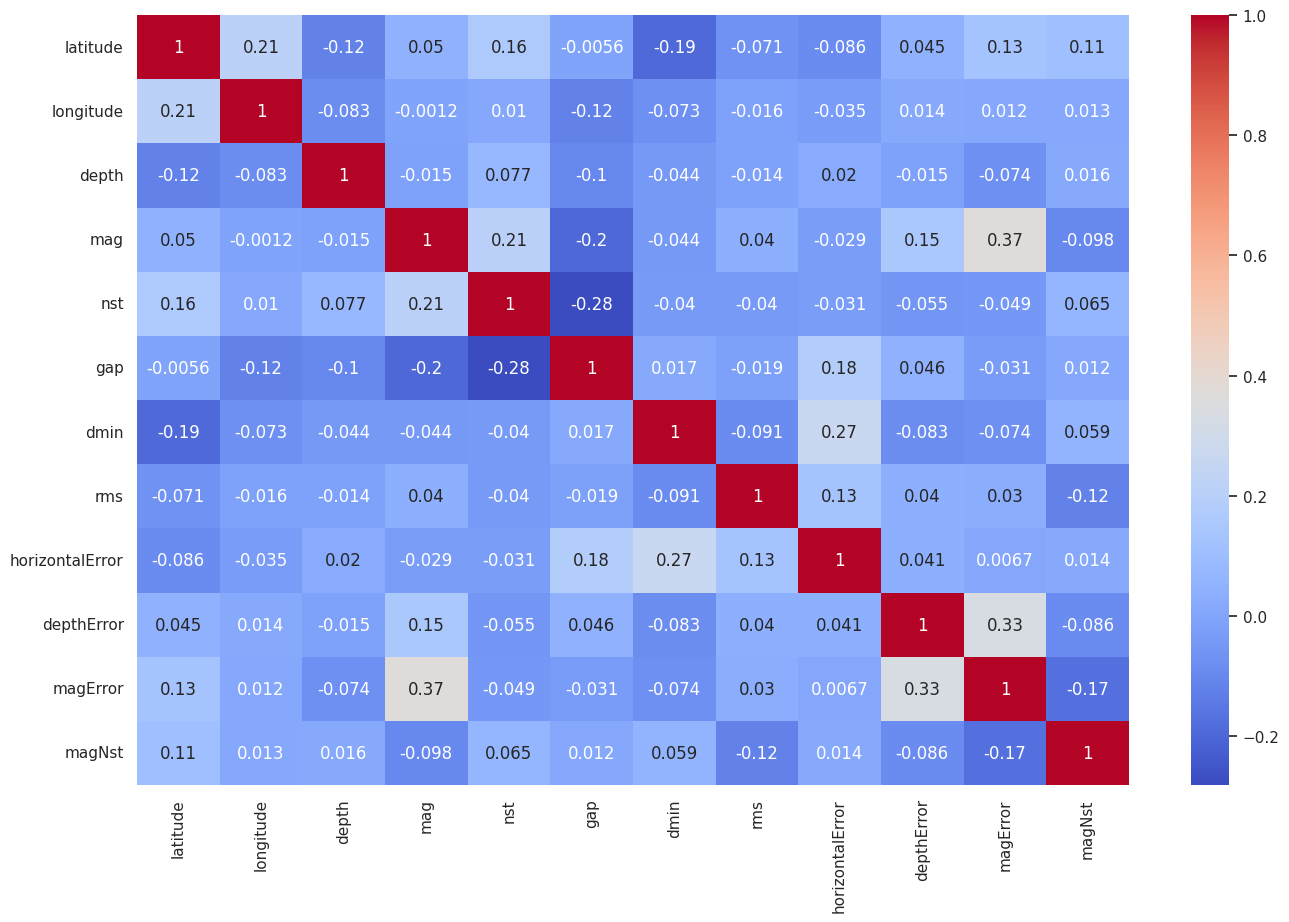

In [73]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

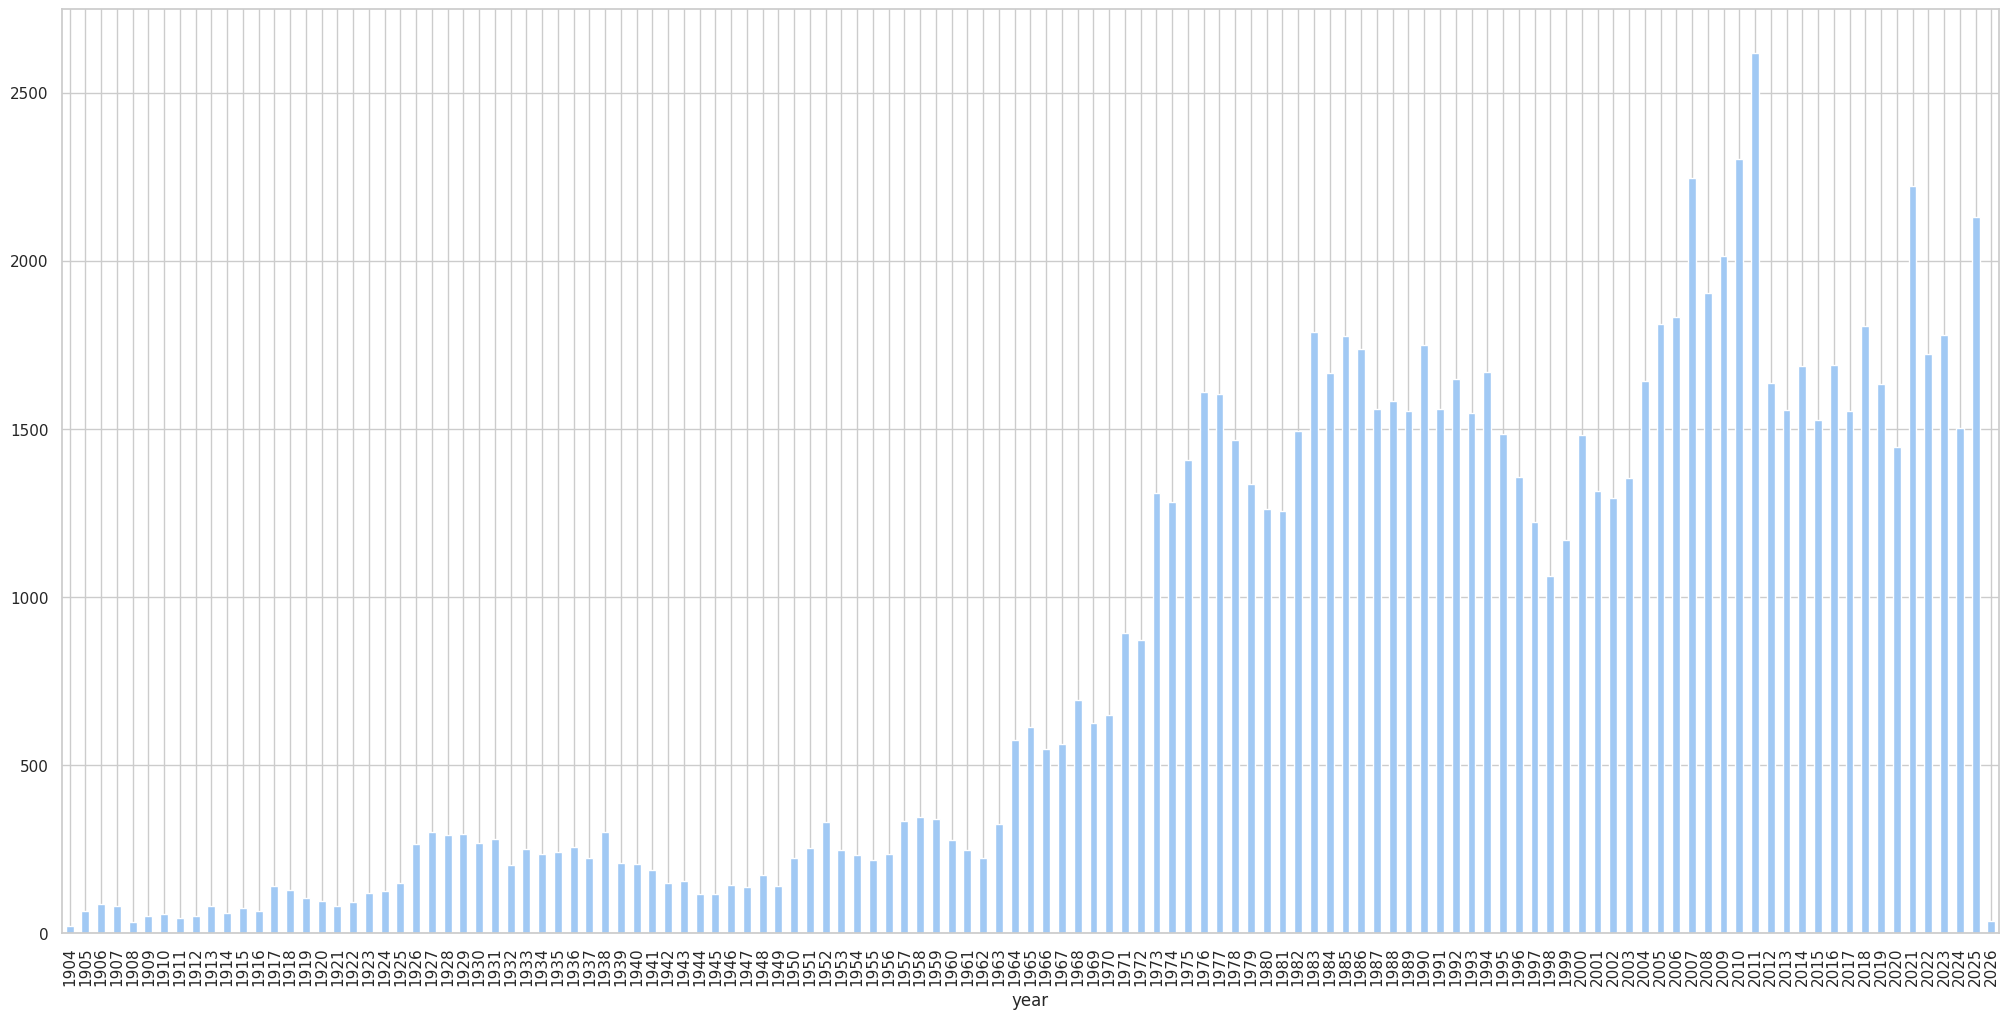

In [79]:
# bar plot of earthquakes per year
plt.figure(figsize=(25, 12))
df["year"].value_counts().sort_index().plot(kind="bar")
plt.show()

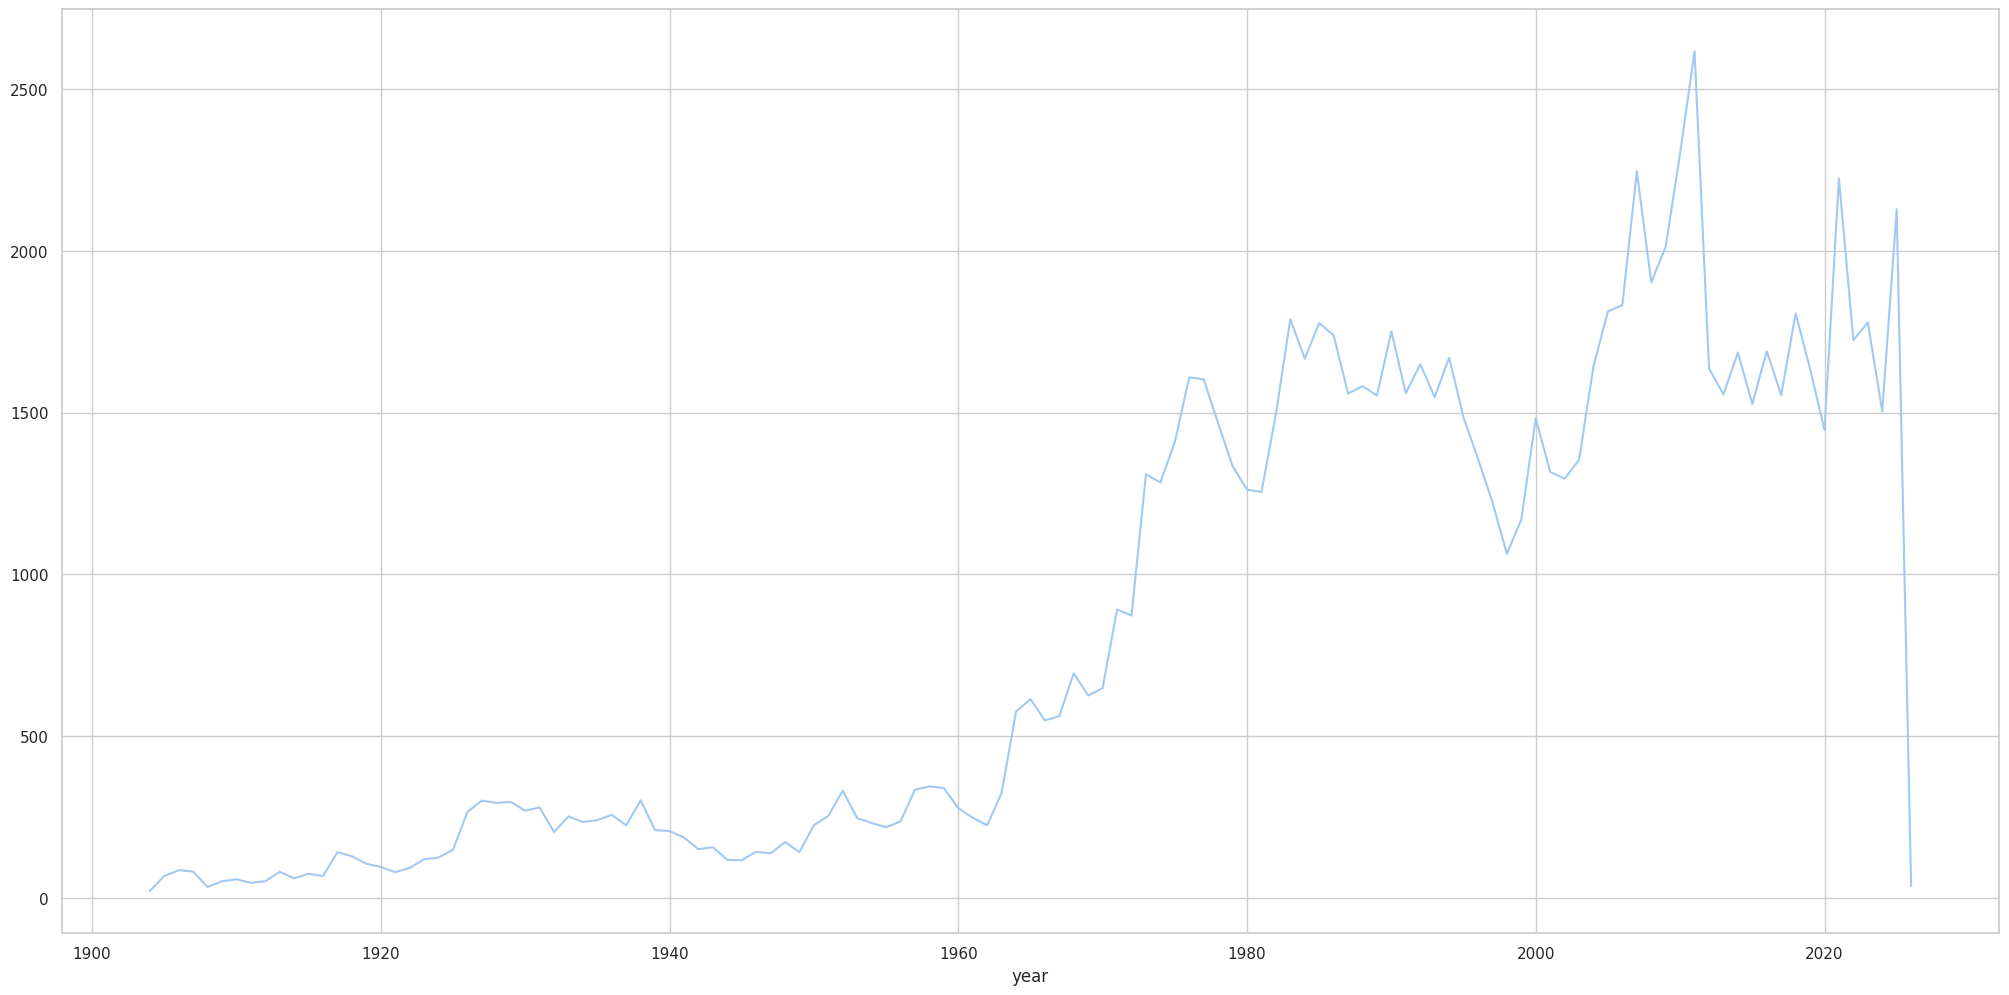

In [80]:
# line plot of earthquakes per year
plt.figure(figsize=(25, 12))
df["year"].value_counts().sort_index().plot(kind="line")
plt.show()

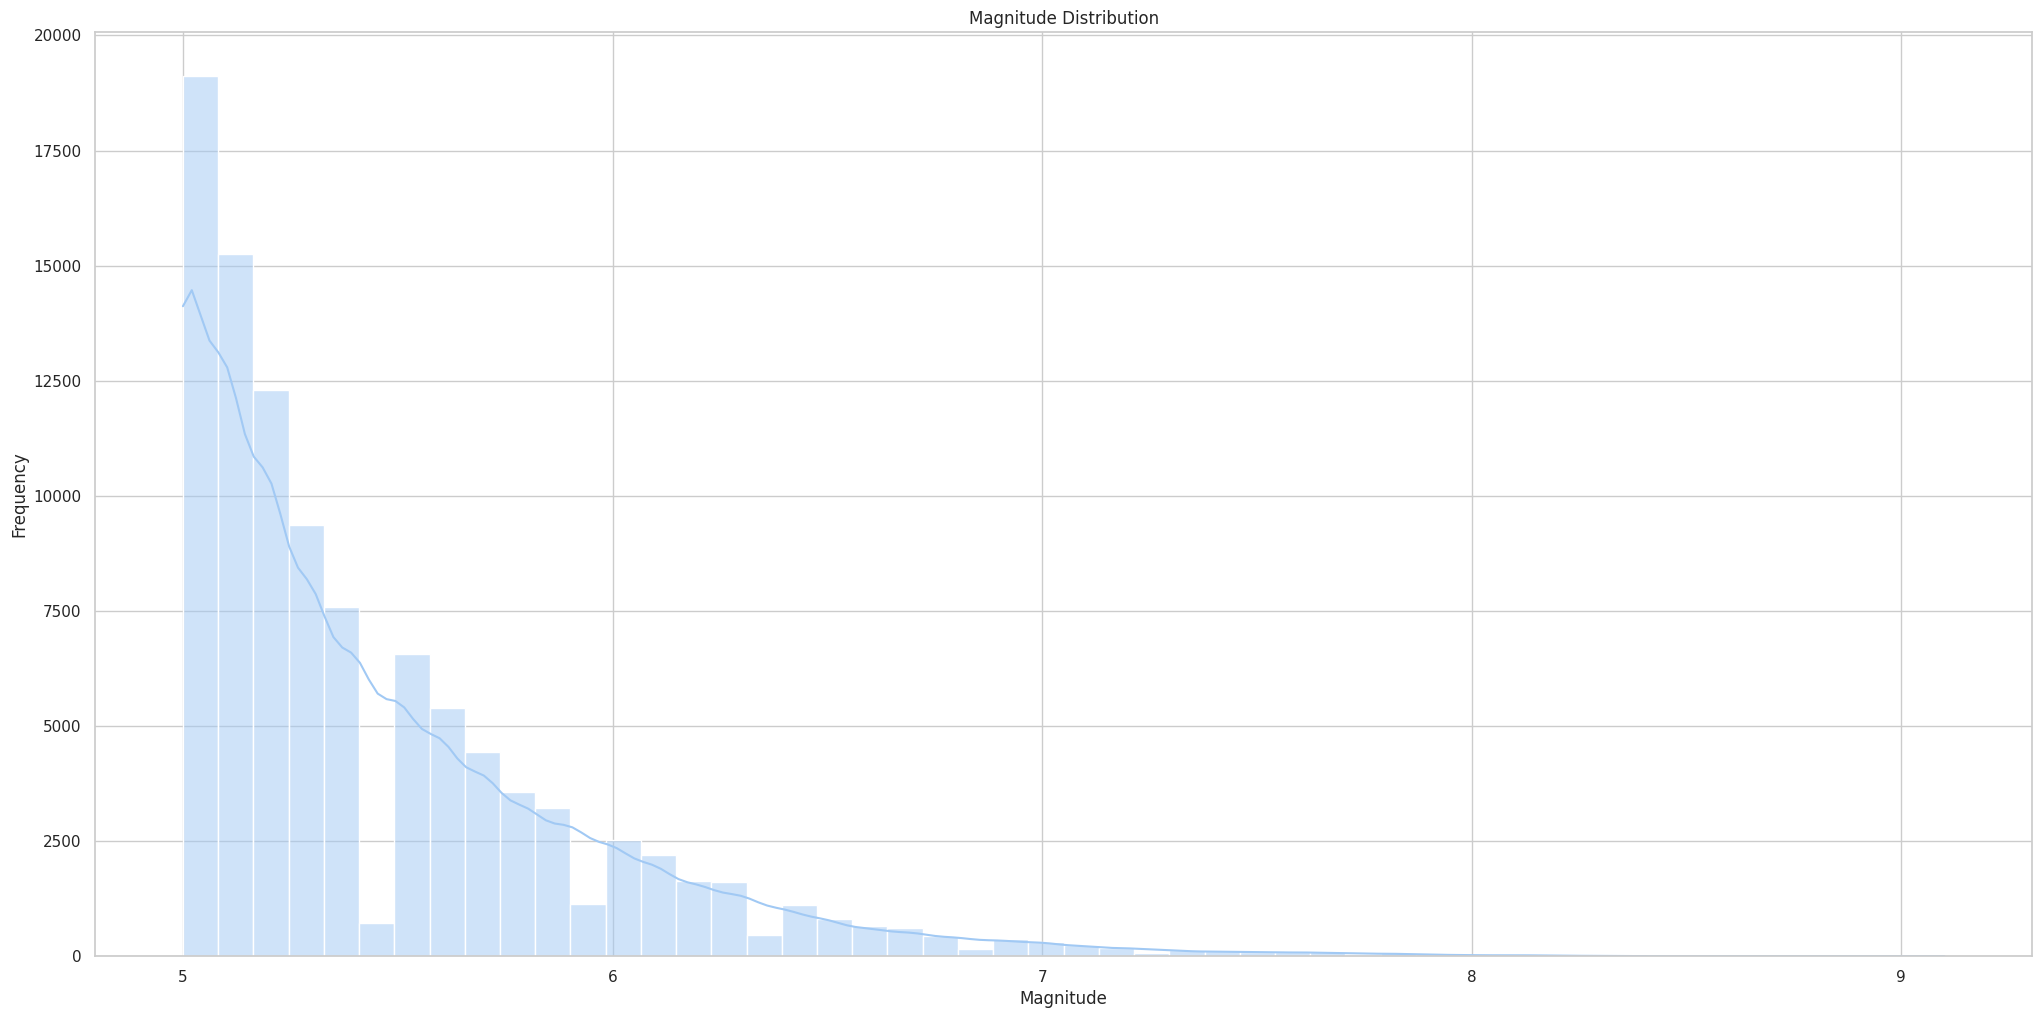

In [87]:
#magnitude distributions
plt.figure(figsize=(25, 12))
sns.histplot(df["mag"], kde=True,bins=50)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Magnitude Distribution")
plt.show()

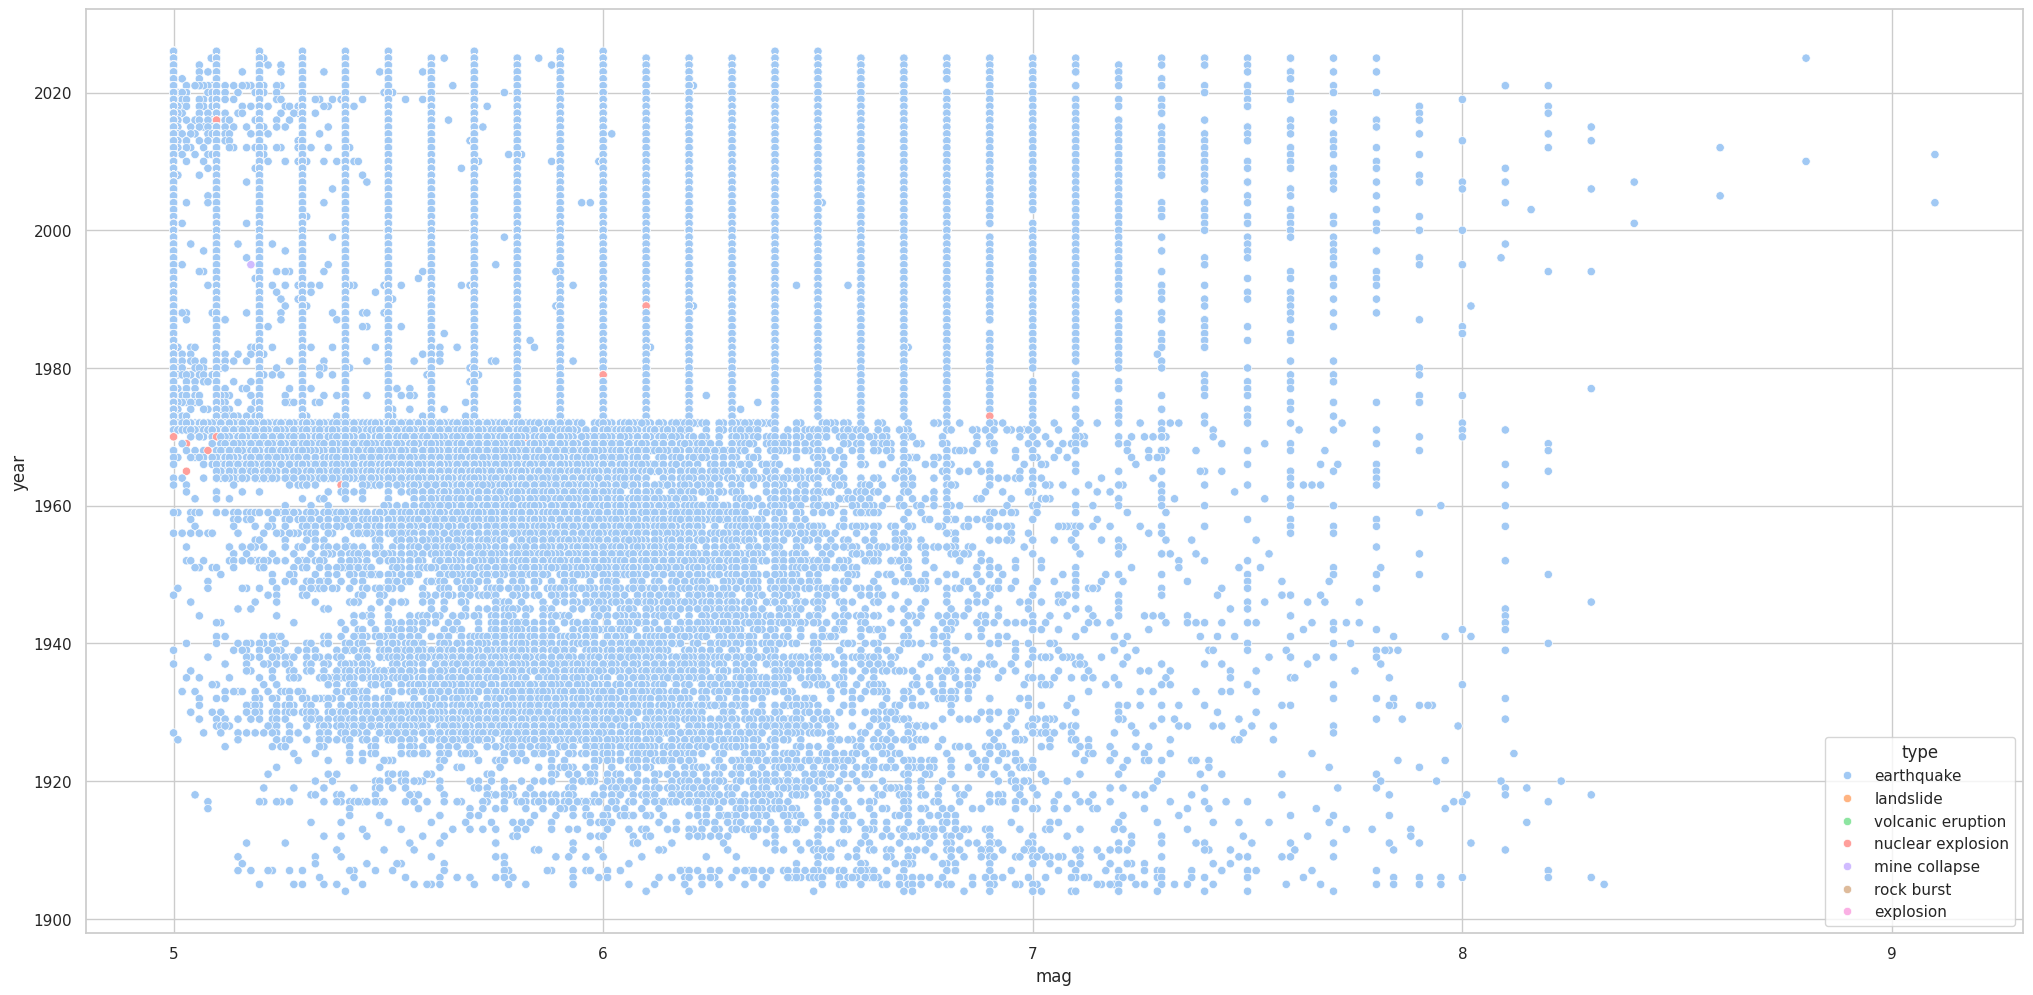

In [90]:
#with hue type anylysis of magnitude
plt.figure(figsize=(25, 12))
sns.scatterplot(data=df,x="mag",y="year",hue="type")
plt.show()

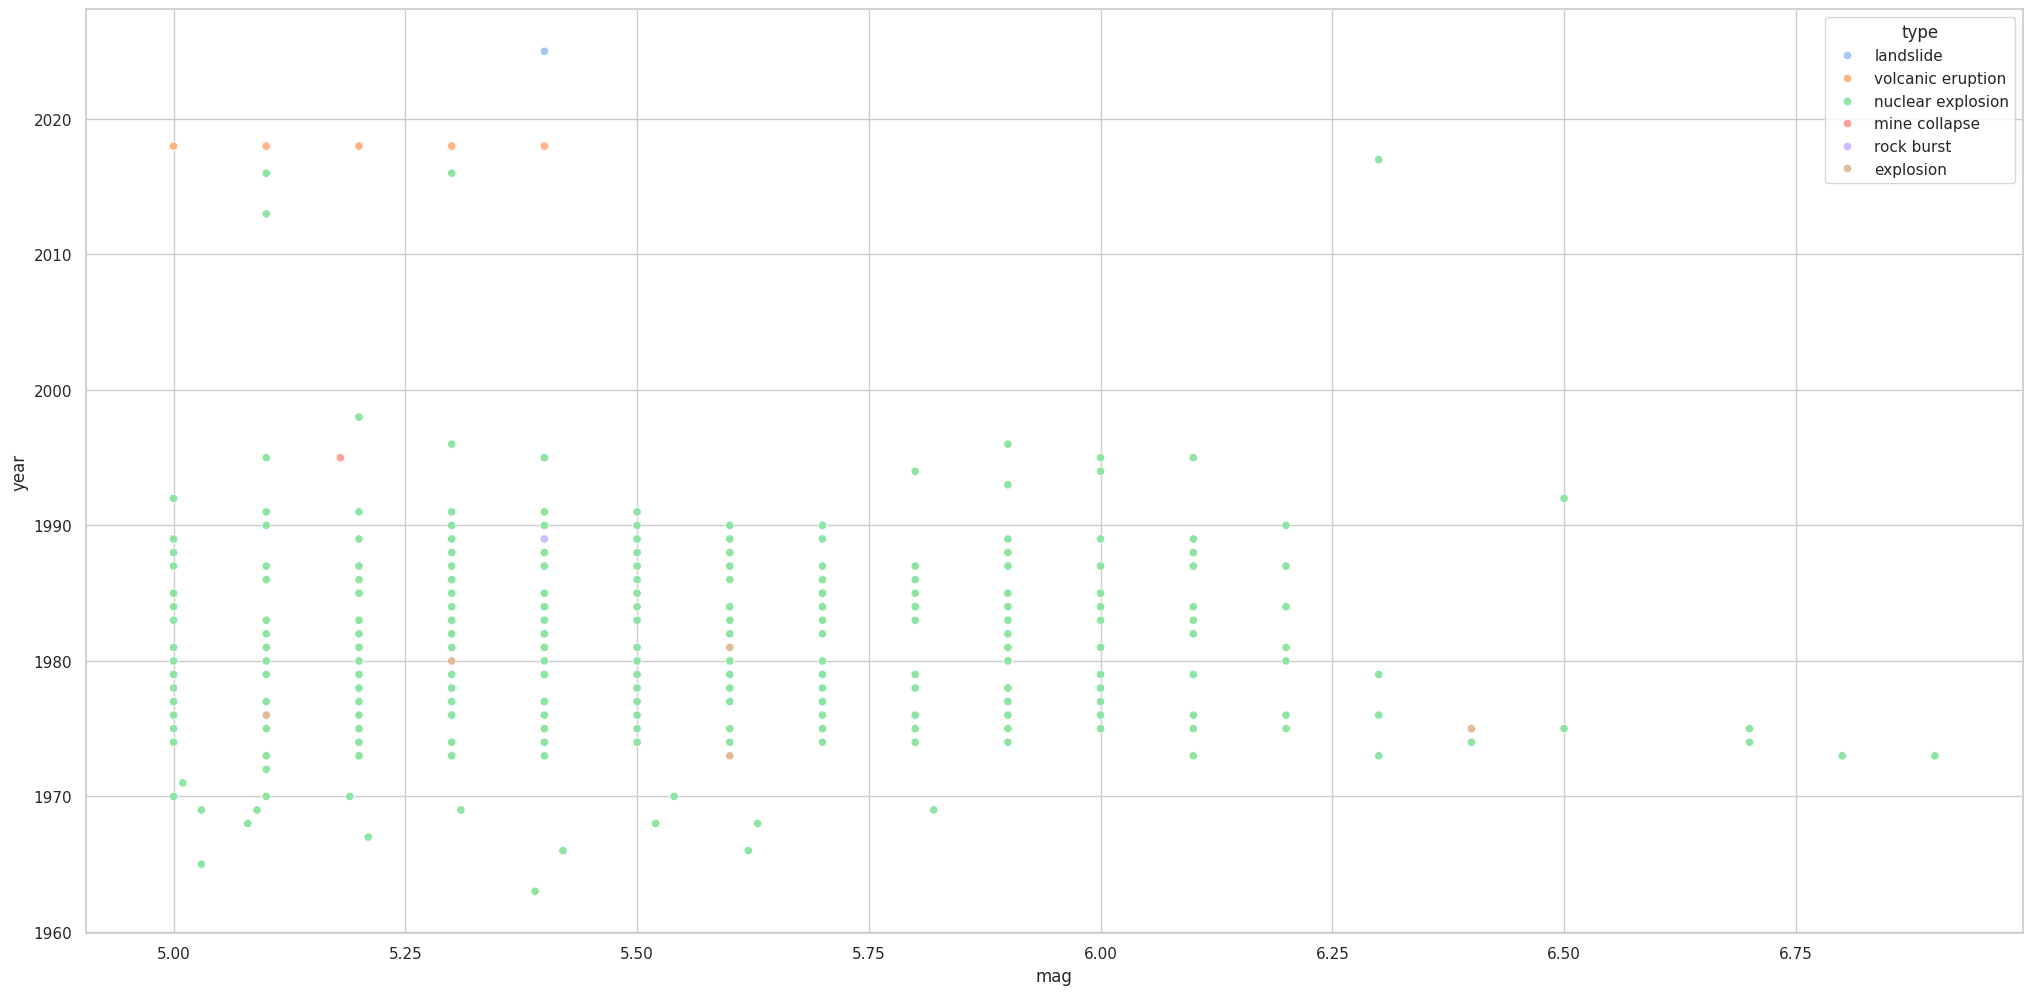

In [91]:
#with hue type excluding earthquake anylysis of magnitude
plt.figure(figsize=(25, 12))
sns.scatterplot(data=df[df["type"] != "earthquake"],x="mag",y="year",hue="type")
plt.show()


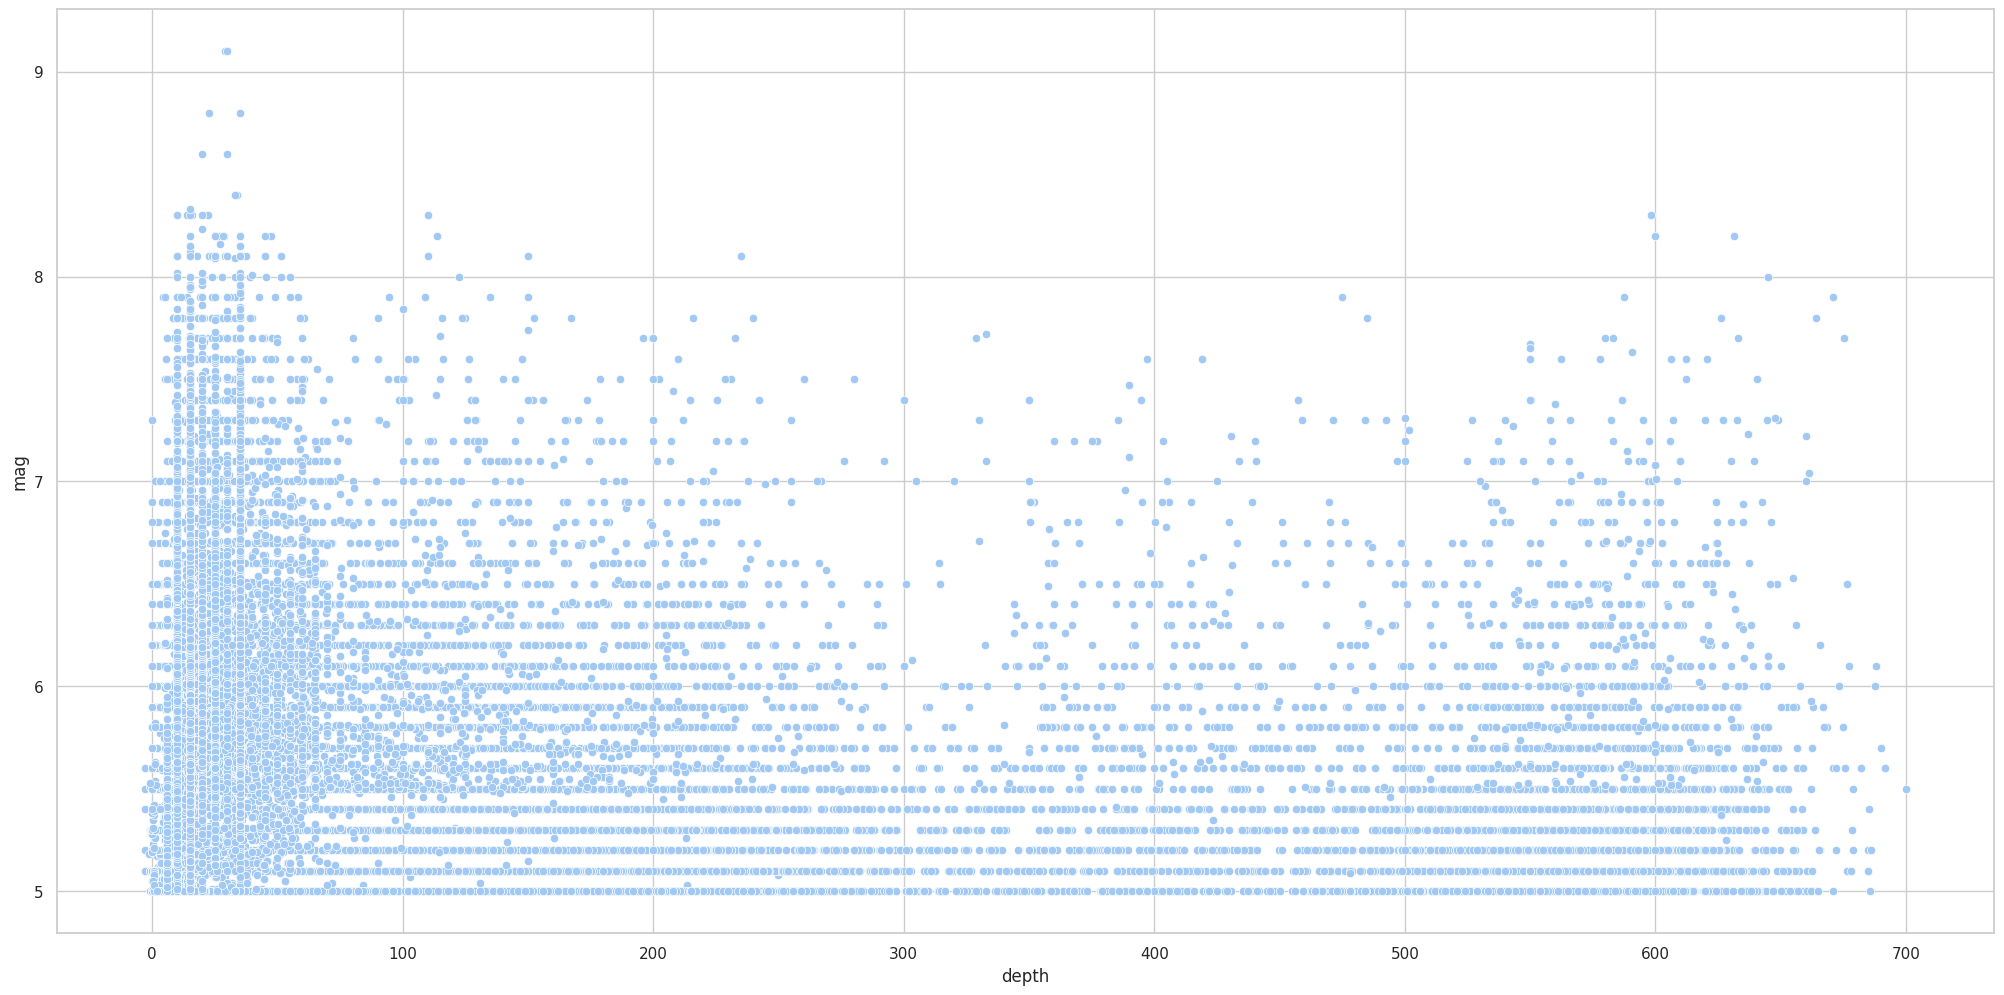

In [94]:
#deapth vs mag
plt.figure(figsize=(25, 12))
sns.scatterplot(data=df,x="depth",y="mag")
plt.show()

<Figure size 2500x1200 with 0 Axes>

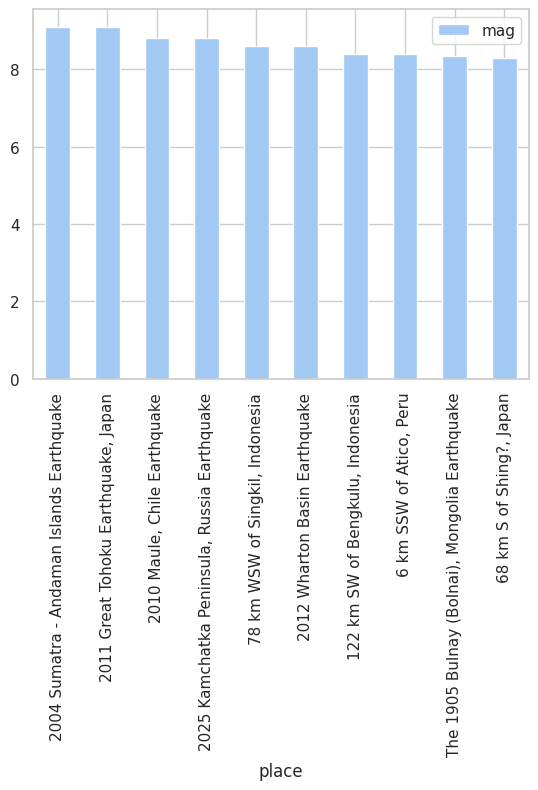

In [95]:
#top 10 earthquakes
plt.figure(figsize=(25, 12))
df.sort_values(by="mag", ascending=False).head(10).plot(kind="bar", x="place", y="mag")
plt.show()

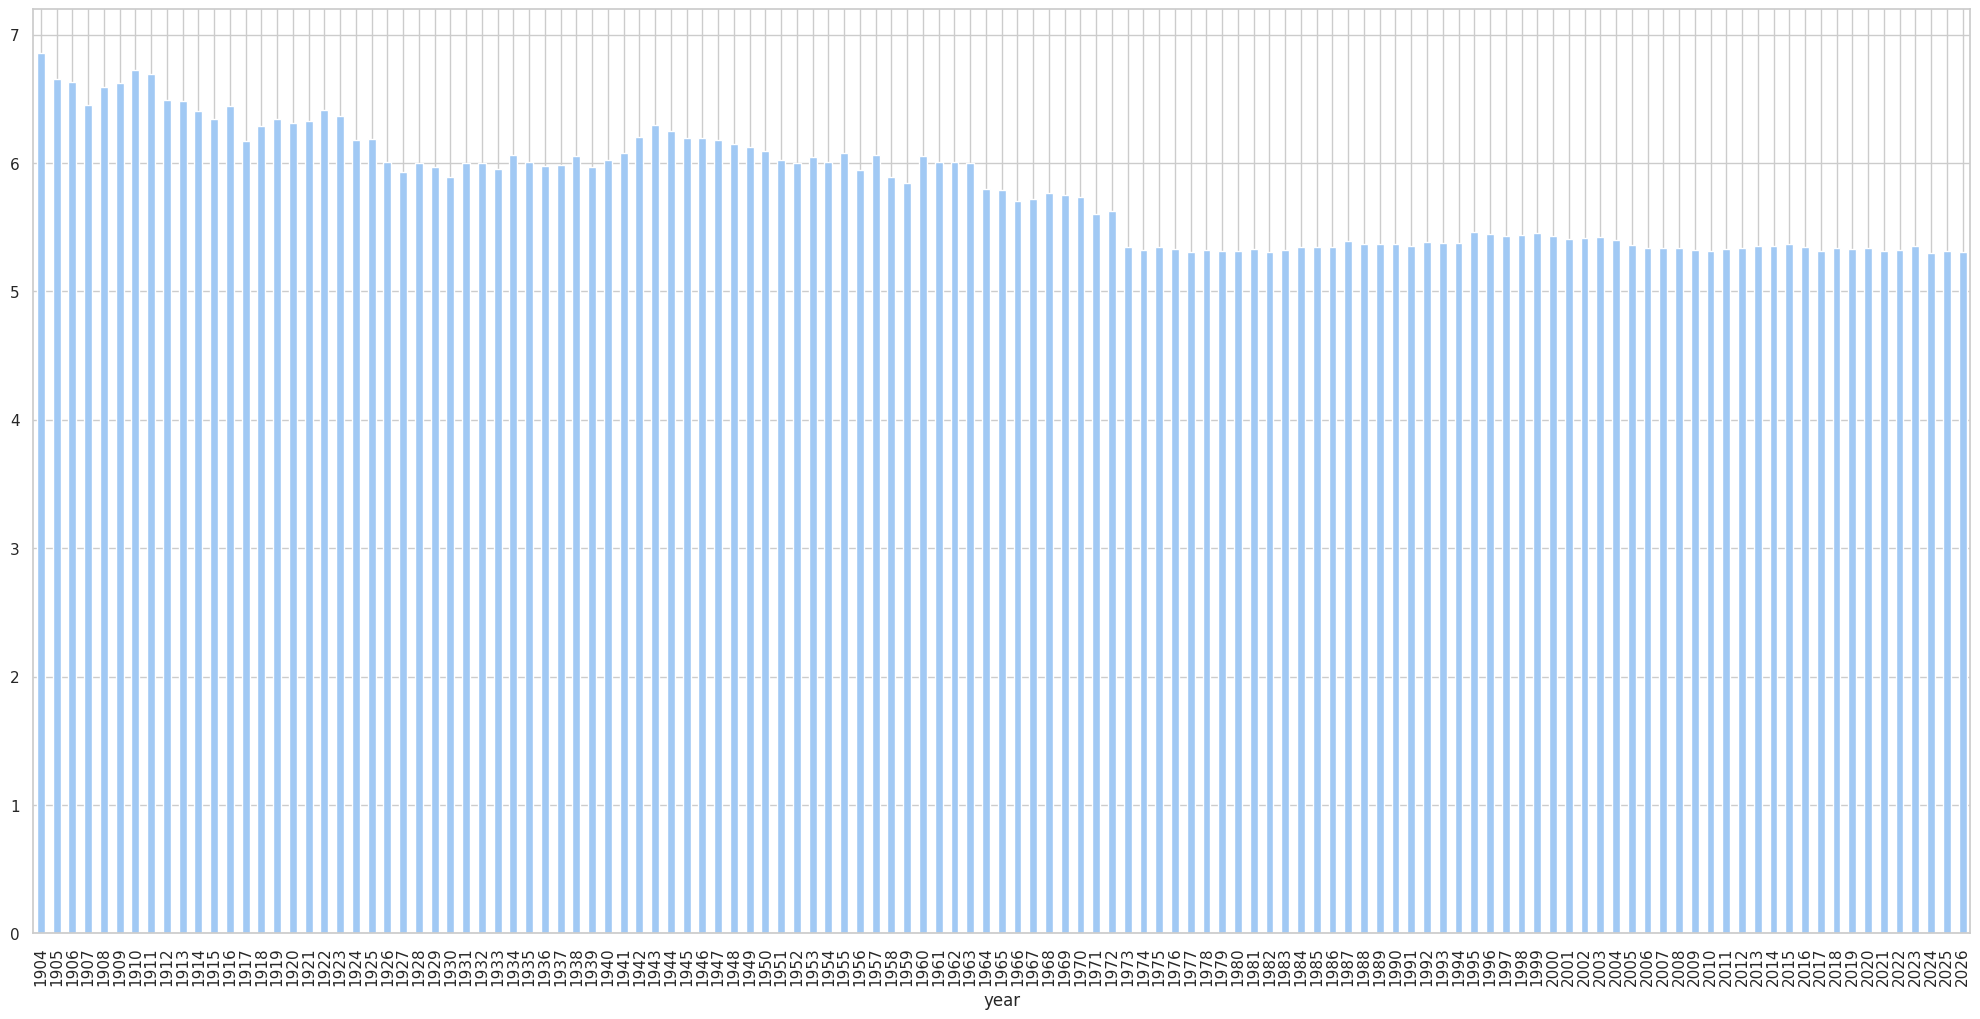

In [98]:
#mean magnitude per year
plt.figure(figsize=(25, 12))
df.groupby("year")["mag"].mean().plot(kind="bar")
plt.show()